In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import math
import warnings

In [21]:
#HISTORICAL_DATA________________________________________
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

def generate_realistic_ledger_data(num_records=10000, anomaly_rate=0.03):
    """
    Generates a one-year historical realistic dataset for ledger account anomaly detection.
    """

    data = []
    end_date = datetime(2023, 12, 31)
    start_date = end_date - timedelta(days=364)
    companies = ['Alpha Corp', 'Beta Ltd', 'Gamma Inc', 'Delta Solutions', 'Epsilon Tech', 'Omega Services', 'Sigma Group', 'Lambda Systems', 'Theta Holdings', 'Kappa Ventures']
    currencies = ['USD', 'EUR', 'GBP', 'JPY', 'CAD', 'AUD', 'CHF', 'CNY', 'SEK', 'NZD']
    accounts = list(range(1000, 1050))
    primary_accounts = list(range(2000, 2020))
    secondary_accounts = list(range(3000, 3020))

    for i in range(num_records):
        date = start_date + timedelta(days=random.randint(0, 364))
        company = random.choice(companies)
        account = random.choice(accounts)
        au = round(np.random.lognormal(mean=5, sigma=1), 2)  # Log-normal distribution for more realistic amounts
        currency = random.choice(currencies)
        primary_account = random.choice(primary_accounts)
        secondary_account = random.choice(secondary_accounts)
        gl_balance = round(np.random.lognormal(mean=12, sigma=2), 2)  # Log-normal for balances
        ihub_balance = gl_balance + round(random.uniform(-gl_balance * 0.01, gl_balance * 0.01), 2)  # Small variations
        is_anomaly = 0
        anomaly_type = None

        if random.random() < anomaly_rate:
            is_anomaly = 1
            anomaly_type = random.choice(['Unusual Amount', 'Unusual Balance Difference', 'Unusual Account Pairing', 'Unusual Time'])

            if anomaly_type == 'Unusual Amount':
                au = round(np.random.lognormal(mean=10, sigma=2), 2)  # Much larger amounts
            elif anomaly_type == 'Unusual Balance Difference':
                ihub_balance = gl_balance + round(random.uniform(gl_balance * 0.1, gl_balance * 0.5), 2)  # Larger differences
            elif anomaly_type == 'Unusual Account Pairing':
                if random.random() < 0.5:
                    primary_account = random.choice(list(range(2021, 2030)))
                else:
                    secondary_account = random.choice(list(range(3021, 3030)))
            elif anomaly_type == 'Unusual Time':
                if random.random() < 0.5:
                    date = date.replace(hour=random.randint(0, 4))
                else:
                    date = date.replace(hour=random.randint(22, 23))

        data.append([date, company, account, au, currency, primary_account, secondary_account, gl_balance, ihub_balance])

    df = pd.DataFrame(data, columns=['Date', 'Company', 'Account', 'AU', 'Currency', 'PrimaryAccount', 'SecondaryAccount', 'GL Balance', 'IHUB Balance'])
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Generate the realistic dataset
realistic_ledger_data = generate_realistic_ledger_data(num_records=10000, anomaly_rate=0.03)

# Display the first few rows
print(realistic_ledger_data.head())


# Save to CSV
realistic_ledger_data.to_csv("historical_realistic_ledger_data.csv", index=False)

        Date       Company  Account      AU Currency  PrimaryAccount  \
0 2023-12-13     Gamma Inc     1023  325.64      AUD            2008   
1 2023-03-10     Gamma Inc     1042   75.50      EUR            2013   
2 2023-07-26      Beta Ltd     1023  442.09      CNY            2022   
3 2023-06-08  Epsilon Tech     1039   44.56      EUR            2003   
4 2023-12-25      Beta Ltd     1023  169.63      CAD            2004   

   SecondaryAccount  GL Balance  IHUB Balance  
0              3011   387755.31     387990.04  
1              3009     5099.08       5056.25  
2              3014   391230.40     389572.77  
3              3014   794343.90     797959.42  
4              3011    88088.89      88908.96  


In [22]:
#check for null values

df.isnull().sum()

df = df.dropna()
df = df.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


232/232 - 5s - 20ms/step - loss: 0.0426
Epoch 2/10
232/232 - 2s - 8ms/step - loss: 0.0381
Epoch 3/10
232/232 - 2s - 9ms/step - loss: 0.0380
Epoch 4/10
232/232 - 2s - 8ms/step - loss: 0.0381
Epoch 5/10
232/232 - 2s - 8ms/step - loss: 0.0380
Epoch 6/10
232/232 - 2s - 8ms/step - loss: 0.0379
Epoch 7/10
232/232 - 2s - 8ms/step - loss: 0.0378
Epoch 8/10
232/232 - 2s - 9ms/step - loss: 0.0378
Epoch 9/10
232/232 - 2s - 8ms/step - loss: 0.0380
Epoch 10/10
232/232 - 2s - 8ms/step - loss: 0.0378
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


<ipython-input-23-64347c51f896>:73: RuntimeWarning: invalid value encountered in greater
  data.loc[mse_full > threshold, 'Anomaly'] = 1


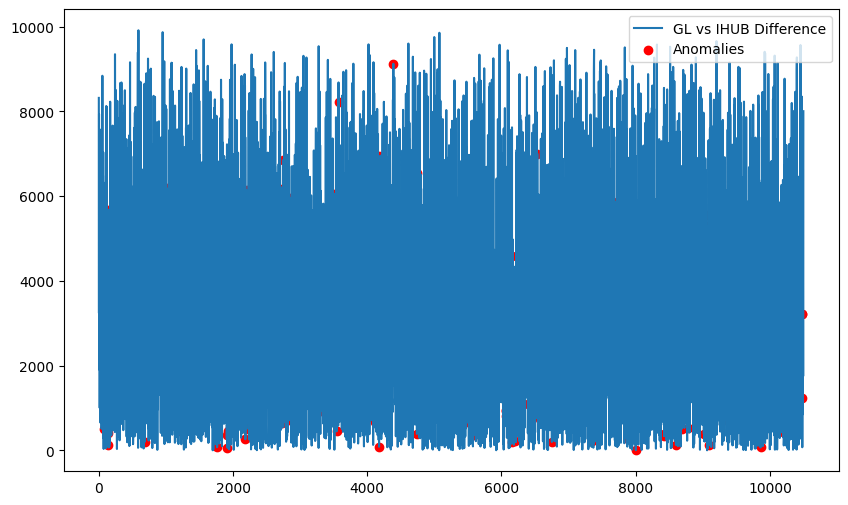

ARIMA+LSTM model saved as 'arima_lstm_anomaly_detection_model.h5'


In [23]:

#MODEL******************************************************************
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
#data = pd.read_csv("historical_realistic_ledger_data.csv")
data = df

# Feature engineering
data['GL vs IHUB Difference'] = abs(data['GL Balance'] - data['IHUB Balance'])

# Step 1: Fit ARIMA
def fit_arima(data, column, ar_order=2, d_order=1, ma_order=2):
    arima_model = ARIMA(data[column], order=(ar_order, d_order, ma_order))
    arima_fit = arima_model.fit()
    residuals = arima_fit.resid
    return residuals

# Fit ARIMA model and calculate residuals
arima_residuals = fit_arima(data, 'GL vs IHUB Difference')

# Step 2: Normalize residuals for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_residuals = scaler.fit_transform(arima_residuals.values.reshape(-1, 1))

# Prepare time-series data for LSTM
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(normalized_residuals, time_steps)

# Reshape X to be compatible with LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 3: Build and train LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1), return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=10, batch_size=32, verbose=2)

# Step 4: Predict anomalies
y_pred = model.predict(X)


# Calculate Mean Squared Error
mse = np.mean(np.power(y - y_pred, 2), axis=1)

# Pad the mse array to match the original dataframe length
mse_full = np.zeros(len(data))
mse_full[:len(mse)] = mse  # Fill MSE values where available
mse_full[len(mse):] = np.nan  # Add NaN for rows that couldn't be processed due to time steps

# Set dynamic anomaly threshold (e.g., 95th percentile of non-NaN values)
threshold = np.nanpercentile(mse_full, 95)

# Assign anomalies to the dataframe
data['Anomaly'] = 0
data.loc[mse_full > threshold, 'Anomaly'] = 1

# Visualize anomalies (optional)
plt.figure(figsize=(10, 6))
plt.plot(data['GL vs IHUB Difference'], label='GL vs IHUB Difference')
plt.scatter(data.index[data['Anomaly'] == 1], data['GL vs IHUB Difference'][data['Anomaly'] == 1],
            color='red', label='Anomalies')
plt.legend()
plt.show()





# Save the model
model_anamoly = model
model.save("arima_lstm_anomaly_detection_model.h5")
print("ARIMA+LSTM model saved as 'arima_lstm_anomaly_detection_model.h5'")


In [24]:
# TEST_DATA***********************************************************

import pandas as pd
import random
from datetime import datetime, timedelta
import numpy as np

# Define constants
NUM_ROWS = 10000
COMPANIES = ["Alpha Inc", "Beta Ltd", "Gamma LLC", "Delta Inc", "Epsilon"]
ACCOUNTS = ["ACC001", "ACC002", "ACC003", "ACC004", "ACC005"]
AUS = ["AU01", "AU02", "AU03", "AU04", "AU05"]
CURRENCIES = ["USD", "EUR", "INR", "GBP", "JPY"]
PRIMARY_ACCOUNTS = ["PA001", "PA002", "PA003", "PA004", "PA005"]
SECONDARY_ACCOUNTS = ["SA001", "SA002", "SA003", "SA004", "SA005"]

# Generate random data
def generate_data(num_rows):
    data = []
    start_date = datetime(2025, 1, 1)
    for _ in range(num_rows):
        row = {
            "Date": (start_date + timedelta(days=random.randint(0, 364))).strftime("%Y-%m-%d"),
            "Company": random.choice(COMPANIES),
            "Account": random.choice(ACCOUNTS),
            "AU": random.choice(AUS),
            "Currency": random.choice(CURRENCIES),
            "Primary Account": random.choice(PRIMARY_ACCOUNTS),
            "Secondary Account": random.choice(SECONDARY_ACCOUNTS),
            "GL Balance": round(random.uniform(5000, 15000), 2),
            "IHUB Balance": round(random.uniform(5000, 15000), 2),
        }
        data.append(row)
    return data

# Introduce imperfections
def introduce_imperfections(df):
    # Add null values randomly
    for col in random.sample(df.columns.tolist(), 3):  # Select 3 random columns to insert NaNs
        for _ in range(len(df) // 10):  # Insert NaNs in roughly 10% of rows
            df.at[random.randint(0, len(df) - 1), col] = np.nan

    # Add duplicate rows
    duplicates = df.sample(frac=0.05, random_state=42)  # 5% of data duplicated
    df = pd.concat([df, duplicates], ignore_index=True)

    # Shuffle data
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    return df

# Generate initial dataset
data = generate_data(NUM_ROWS)
df = pd.DataFrame(data)

# Introduce imperfections
df_with_issues = introduce_imperfections(df)

# Save the dataset
df_with_issues.to_csv("ledger_anomaly_dataset_realistic.csv", index=False)
print("Dataset with imperfections saved as 'ledger_anomaly_dataset_realistic.csv'")


Dataset with imperfections saved as 'ledger_anomaly_dataset_realistic.csv'


In [25]:
#check for null values
df_with_issues.isnull().sum()
df = df_with_issues

In [26]:
df = df_with_issues.dropna()

In [27]:
df = df.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<ipython-input-28-585d74b336f3>:49: RuntimeWarning: invalid value encountered in greater
  data.loc[mse_full > threshold, 'Anomaly'] = 1


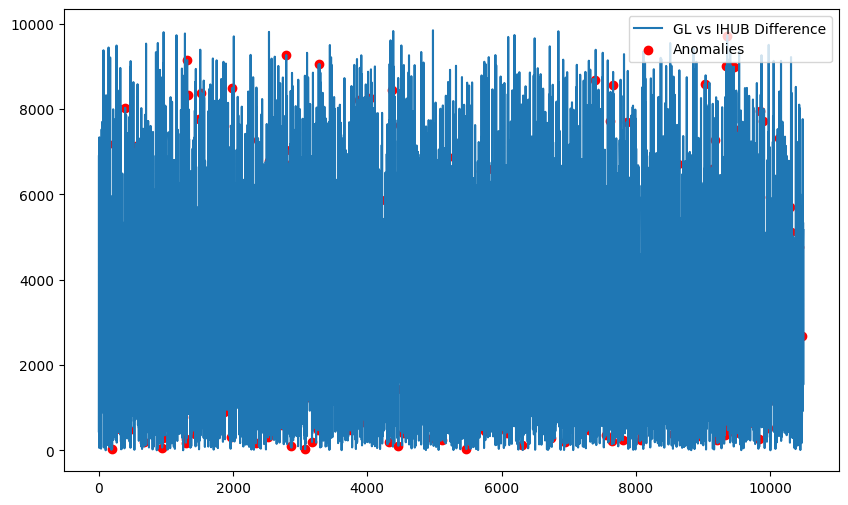

Updated dataset saved with 'Reason for Anomaly' column.


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load dataset
#data = pd.read_csv("ledger_anomaly_dataset.csv")
data=df
data['GL vs IHUB Difference'] = abs(data['GL Balance'] - data['IHUB Balance'])

# Fit ARIMA and calculate residuals
def fit_arima(data, column, ar_order=2, d_order=1, ma_order=2):
    arima_model = ARIMA(data[column], order=(ar_order, d_order, ma_order))
    arima_fit = arima_model.fit()
    residuals = arima_fit.resid
    return residuals

arima_residuals = fit_arima(data, 'GL vs IHUB Difference')

# Normalize the residuals for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_residuals = scaler.fit_transform(arima_residuals.values.reshape(-1, 1))

# Prepare data for LSTM
def create_sequences(data, time_steps=10):
    X = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
    return np.array(X)

time_steps = 10
X_new = create_sequences(normalized_residuals, time_steps)
X_new = X_new.reshape(X_new.shape[0], X_new.shape[1], 1)

# Load the model and make predictions
#model = load_model("arima_lstm_anomaly_detection_model.h5")
predictions = model_anamoly.predict(X_new)

# Calculate MSE and detect anomalies
mse = np.mean(np.power(normalized_residuals[time_steps:] - predictions.flatten(), 2), axis=1)
mse_full = np.zeros(len(data))
mse_full[:len(mse)] = mse
mse_full[len(mse):] = np.nan

threshold = np.percentile(mse, 95)
data['Anomaly'] = 0
data.loc[mse_full > threshold, 'Anomaly'] = 1

# Assign reasons for anomalies
def assign_anomaly_reason(row):
    if row['Anomaly'] == 1:
        if row['GL vs IHUB Difference'] > row['GL Balance'] * 0.2:
            return "High Balance Difference"
        else:
            return "Unusual Transaction Pattern"
    return "No Anomaly"

data['Reason for Anomaly'] = data.apply(assign_anomaly_reason, axis=1)

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.plot(data['GL vs IHUB Difference'], label='GL vs IHUB Difference')
plt.scatter(data.index[data['Anomaly'] == 1], data['GL vs IHUB Difference'][data['Anomaly'] == 1],
            color='red', label='Anomalies')
plt.legend()
plt.show()

# Save updated dataset
data.to_csv("updated_ledger_dataset.csv", index=False)
print("Updated dataset saved with 'Reason for Anomaly' column.")


In [29]:
df.head

<bound method NDFrame.head of              Date    Company Account    AU Currency Primary Account  \
1      2025-06-15    Epsilon  ACC005  AU05      EUR           PA001   
2      2025-10-06  Delta Inc  ACC005  AU05      USD           PA004   
3      2025-01-06  Delta Inc  ACC003  AU05      EUR           PA005   
5      2025-08-20    Epsilon  ACC003  AU03      EUR           PA004   
6      2025-07-29  Gamma LLC  ACC004  AU04      GBP           PA001   
...           ...        ...     ...   ...      ...             ...   
10491  2025-09-07  Delta Inc  ACC003  AU01      INR           PA001   
10493  2025-08-17   Beta Ltd  ACC005  AU03      GBP           PA003   
10495  2025-11-29  Delta Inc  ACC001  AU04      JPY           PA001   
10496  2025-11-04  Gamma LLC  ACC002  AU05      INR           PA001   
10497  2025-12-18    Epsilon  ACC002  AU03      EUR           PA003   

      Secondary Account  GL Balance  IHUB Balance  GL vs IHUB Difference  \
1                 SA001    10448.99      